# Sistema de agrupación de casas (Solucion con K-Means)

#### Paso 1: Procedamos con la carga del conjunto de datos

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

total_data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

En este caso solo nos interesan las columnas `Latitude`, `Longitude` y `MedInc`, por lo cual las seleccionamos y almacenaremos a continuacion.

In [2]:
X = total_data[["MedInc", "Latitude", "Longitude"]]
X.head()

MedInc  Latitude  Longitude
0  8.3252     37.88    -122.23
1  8.3014     37.86    -122.22
2  7.2574     37.85    -122.24
3  5.6431     37.85    -122.25
4  3.8462     37.85    -122.25

Ahora procederemos a dividir convenientemente el conjunto de datos en train y test como hemos visto en lecciones anteriores.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

X_train.head()

MedInc  Latitude  Longitude
14196  3.2596     32.71    -117.03
8267   3.8125     33.77    -118.16
17445  4.1563     34.66    -120.48
14265  1.9425     32.69    -117.11
2271   3.5542     36.78    -119.80

#### Paso 2: Construye un K-Means

Procederemoa a clasifica los datos en 6 clusters utilizando, para ello, el modelo K-Means.



In [5]:
from sklearn.cluster import KMeans

# Entrenamiento del modelo
model = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

Insertartaremos los clusters en el conjunto de datos de entrenamiento

In [6]:
y_train = list(model.labels_)
X_train["cluster"] = y_train
X_train.head()

MedInc  Latitude  Longitude  cluster
14196  3.2596     32.71    -117.03        3
8267   3.8125     33.77    -118.16        1
17445  4.1563     34.66    -120.48        1
14265  1.9425     32.69    -117.11        3
2271   3.5542     36.78    -119.80        5

Una vez clasificados, veamos un grafico de estos resultados, donde las unicas combinaciones posibles sin repeticion para visualizar en el plano carteciano serian:

1. `Latitude` y `Longitude`
2. `Latitude` y `MedInc`
3. `Longitude` y `MedInc`

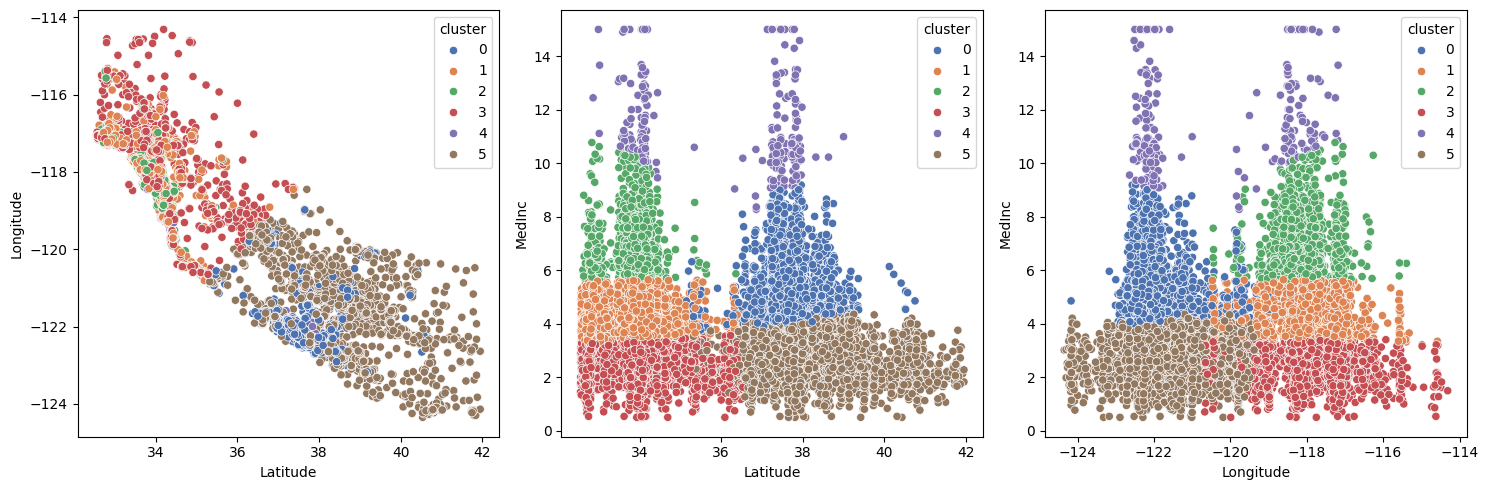

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()



De estos graficos podemos ver que:

+ El primer grafico muestra la relacion entre las variables `Latitude` ubidada en el eje X  y  `Longitude` ubicada en el eje Y, Donde cada cada color etiquedado desde el `0` hasta el `5` refleja en que clase de agrupamiento pertenece ese punto en particular.

+ El segundo grafico muestra la relacion entre las variables `Latitude` ubidada en el eje X  y  `MedInc` ubicada en el eje Y, Donde cada cada color etiquedado desde el `0` hasta el `5` refleja en que clase de agrupamiento pertenece ese punto en particular.

+ Finalmente, el tercer grafico muestra la relacion entre las variables `Longitude` ubidada en el eje X  y  `MedInc` ubicada en el eje Y, Donde cada cada color etiquedado desde el `0` hasta el `5` refleja en que clase de agrupamiento pertenece ese punto en particular.

#### Paso 3: Predice con el conjunto de test


Ahora utilizaremos el modelo entrenado con el conjunto test y añaderemos los puntos al gráfico anterior para confirmar si la predicción es satisfactoria o no.

In [8]:
y_test = list(model_unsup.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

MedInc  Latitude  Longitude  cluster
20046  1.6812     36.06    -119.01        3
3024   2.5313     35.14    -119.46        3
15663  3.4801     37.80    -122.44        5
20484  5.7376     34.28    -118.72        2
9814   3.7250     36.62    -121.93        5

Una vez Predicho y clasificados, veamos un grafico de estos resultados, donde las unicas combinaciones posibles sin repeticion para visualizar en el plano carteciano serian:

1. `Latitude` y `Longitude`
2. `Latitude` y `MedInc`
3. `Longitude` y `MedInc`

In [9]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

Este grafico permite apreciar que tenemos una buenna fiabilidad a la hora de predecir a qué clúster pertenece cada punto de los datos de prueba.



### Paso 4: Entrena un modelo de clasificación supervisada

Como estamos realizando un modelo para clasificar informacion, un modelo de clasificacion supervisado que puede ser adecuado y facil de utilizar es el modelo de arboles de decision,

Este saleccion me parece adecuada ya que:

+ Permite categorizar elementos según sus caracteristicas
+ No existe una relación lineal clara entre algunas variables segun sus graficos.
+ No estamos oblicados a normalizar/estandarizar la informaion. 

Procedamos a cargar y entrenar el modelo de arbol


In [11]:
from sklearn.tree import DecisionTreeClassifier

model_new = DecisionTreeClassifier(random_state = 42)
model_new.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Una vez que el modelo se ha entrenado correctamente, podemos visualizar el árbol

In [13]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_new, feature_names = list(X_train.columns),
                class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [15]:
# Numero de nodos terminales
num_nodos_terminales = model_new.tree_.n_leaves
print("Numero de nodos terminales:", num_nodos_terminales)

Numero de nodos terminales: 8


In [16]:
# Funcion niveles de Arbol

def get_tree_depth(tree_, feature_names=None):
    """
    Calcula la profundidad (número de niveles) de un árbol de decisión.

    Args:
        tree_: El árbol de decisión entrenado.
        feature_names: (Opcional) Nombres de las características.

    Returns:
        int: La profundidad del árbol.
    """

    children_left = tree_.children_left
    children_right = tree_.children_right

    def recurse(node):
        if children_left[node] < 0:
            return 0
        left_height = 1 + recurse(children_left[node])
        right_height = 1 + recurse(children_right[node])
        return max(left_height, right_height)

    return recurse(0)

# Salida de la funcion:
depth = get_tree_depth(model_new.tree_)
print("La profundidad del árbol es:", depth)

La profundidad del árbol es: 6


El arbol encontrado tiene 6 niveles y 8 nodos terminales.

Encontremos las predicciones del modelo y nivel de precision.

In [18]:
y_pred = model_new.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

Este resultado dice que el modelo fue excelente, lo cual indica que es bueno para clasificar, ahora

Paso 5: Guarda los modelos

In [22]:
import os

# Suponiendo que el directorio "my_models" está en la misma carpeta que su script
models_dir = "my_models"

# Crea el directorio si no existe
os.makedirs(models_dir, exist_ok=True)

from pickle import dump

# Guarde el modelo con la nueva ruta
dump(model, open(os.path.join(models_dir, "unsupervised_learning_pp_k_means.sav"), "wb"))
dump(model_new, open(os.path.join(models_dir, "decision_tree_pp.sav"), "wb"))